In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bash-UK/TE_Sppu_DSBDA_Lab/main/Datasets/AreaPricePred.csv')
df

,area,price(in lakhs)
0,2618,20.0
1,5691,49.5
2,6735,53.0
3,6982,54.3
4,4401,30.4
5,4570,30.9
6,6391,50.2
7,4523,30.6
8,3353,25.8
9,6463,50.6


In [4]:
df.rename(columns = {'price(in lakhs)':'price'}, inplace= True)
df

,area,price
0,2618,20.0
1,5691,49.5
2,6735,53.0
3,6982,54.3
4,4401,30.4
5,4570,30.9
6,6391,50.2
7,4523,30.6
8,3353,25.8
9,6463,50.6


<Axes: xlabel='area', ylabel='price'>

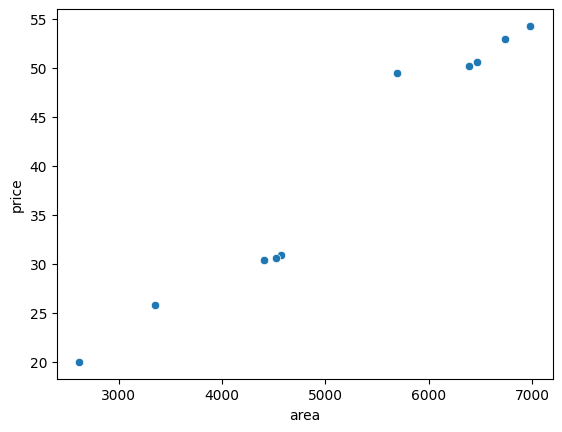

In [5]:
sns.scatterplot(data=df, x="area", y="price")

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
x = df.drop("price", axis=1)
y = df.drop("area", axis=1)

In [9]:
model.fit(x,y)

LinearRegression()

In [13]:
import numpy as np
areas = np.array([[6982]])

In [14]:
model.predict(areas)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[54.92351265]])

Multiple Linear Regression [Boston]

In [15]:
house = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [16]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Train test split

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


Rows in train set: 404
Rows in test set: 102



Correlation

In [19]:
corr_matrix = house.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

Train the Model

In [20]:
train_x = train_set.drop('medv', axis=1)
train_y = train_set['medv']

Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(train_x,train_y)

LinearRegression()

Predict

In [23]:
pred_test_x=test_set.drop("medv",axis=1)
pred_test_y = test_set['medv']


pred_test_output = lin_model.predict(pred_test_x)


In [24]:
#Root mean Squared error

from sklearn.metrics import mean_squared_error
mse= mean_squared_error(pred_test_y,pred_test_output)
rmse = np.sqrt(mse)
print(rmse)

4.928602182665332


In [25]:
from sklearn.metrics import r2_score
R2= r2_score(pred_test_y,pred_test_output)
print(R2)

0.6687594935356326


In [26]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF_model.fit(train_x,train_y)


RandomForestRegressor()

In [27]:
pred_test_x=test_set.drop("medv",axis=1)
test_y = test_set['medv']


test_output = RF_model.predict(pred_test_x)

In [28]:
from sklearn.metrics import r2_score
R2= r2_score(test_y,test_output)
print(R2)

0.8821754742067482
